# 📘 Introduction to Logistic Regression for AI Beginners

## Welcome to Your First AI Classification Model!

Welcome! In this 2-hour session, we're going to explore one of the most fundamental and widely used algorithms in machine learning: **Logistic Regression**.

Despite its name, it's a model for **classification**, not regression. We use it to predict outcomes that fall into categories, like 'Yes' or 'No', 'Spam' or 'Not Spam'. It's a powerful tool used everywhere, from predicting customer behavior in marketing to identifying diseases in healthcare.

### 🎯 Learning Objectives for Today:

By the end of this session, you will be able to:
1.  **Understand** what Logistic Regression is and when to use it.
2.  **Explain** how the Sigmoid function works to create probabilities.
3.  **Grasp** the concepts of Odds and Log-Odds.
4.  **Build** a simple Logistic Regression model in Python using `scikit-learn`.
5.  **Make predictions** and evaluate your model's accuracy.

Let's get started on our journey to building intelligent models! 🚀

--- 
## Topic 1: From Linear to Logistic Regression

### 📄 Explanation: The Problem with a Straight Line

To understand logistic regression, let's first think about **linear regression**. A linear regression model tries to fit a straight line to your data to predict a continuous value (like predicting a house price).

The equation looks like this: `y = β₀ + β₁x₁ + ... + βₙxₙ`

But what if we want to predict a category, like `Spam (1)` or `Not Spam (0)`? A straight line has two big problems:

1.  **It can predict values outside of 0 and 1.** A straight line can go on forever, so it might predict `1.5` or `-0.5`. How can you have a 150% chance of an email being spam? It doesn't make sense!
2.  **The relationship isn't always linear.** The switch from 'Not Spam' to 'Spam' is usually more of a curve than a straight line.

Logistic Regression solves this by using a special function to bend the straight line into an 'S'-shaped curve that is always stuck between 0 and 1.

### 💡 Real-World Example: Predicting Loan Default

Imagine a bank wants to predict if a customer will default on a loan.

- **Outcome (y):** Loan Default (1 for Yes, 0 for No)
- **Features (x):** `credit_score`, `income`, `loan_amount`, etc.

A logistic regression model can take these features and calculate the **probability** of the customer defaulting. The bank can then set a rule: if the probability is higher than 70%, the loan application is flagged for review.

### 🧠 Practice Task

Think of another real-world scenario (not mentioned above) where you need to classify something into one of two categories. What are the features you might use?

*Write your answer here:*

--- 
## Topic 2: The Magic Ingredient - The Sigmoid Function

### 📄 Explanation: The 'S' Curve

The magic ingredient in Logistic Regression is the **Logistic Function**, also known as the **Sigmoid Function**. It's a beautiful 'S'-shaped curve that takes any real number and 'squashes' it into a value between 0 and 1.

This is perfect for us, because we can interpret this output as a **probability**!

The formula is: 
### σ(z) = 1 / (1 + e⁻ᶻ)

Where `z` is the output of our familiar linear equation (`z = β₀ + β₁x₁ + ...`).

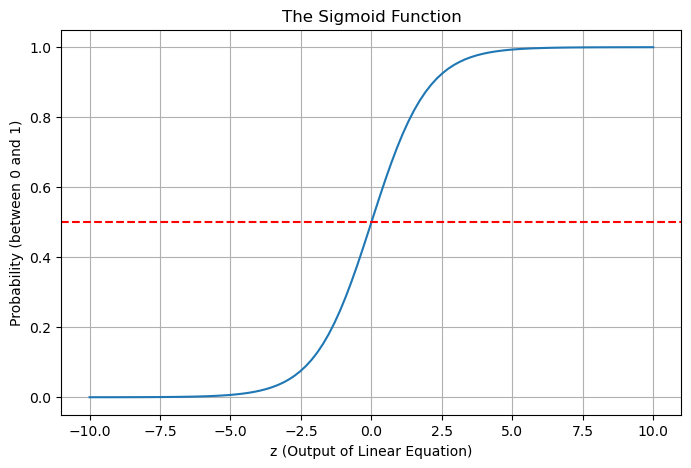

In [1]:
# 💻 Code Example: Let's visualize the Sigmoid function!

import numpy as np
import matplotlib.pyplot as plt

# This is the sigmoid function written in Python
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Let's create a range of numbers from -10 to 10
z_values = np.linspace(-10, 10, 100)

# Apply the sigmoid function to each number
probabilities = sigmoid(z_values)

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(z_values, probabilities)
plt.title('The Sigmoid Function')
plt.xlabel('z (Output of Linear Equation)')
plt.ylabel('Probability (between 0 and 1)')
plt.grid(True)
plt.axhline(y=0.5, color='r', linestyle='--') # Add a line at the 0.5 probability mark
plt.show()

# 🧪 Try changing the range of z_values (e.g., -5 to 5) and see how the plot changes!

### 🧠 Practice Task

Let's see what the sigmoid function outputs for a few specific values. Use the code cell below to calculate the probability for the following `z` values: `0`, `100`, and `-100`.

In [2]:
# The sigmoid function is already defined for you from the cell above

# Calculate the probability for z = 0
prob_zero = sigmoid(0)
print(f"For z = 0, the probability is: {prob_zero}")

# Now, you try! Calculate the probability for z = 100
# your_code_here

# And for z = -100
# your_code_here

For z = 0, the probability is: 0.5


✅ **Well done!** You've seen how the sigmoid function perfectly maps numbers to a 0-1 range.

In [3]:
# 💻 Mathematical Example: Predicting Exam Pass Rate

import numpy as np

# Let's say our trained model for passing an exam is:
# log-odds = -3 + 0.8 * hours_studied

# If a student studies for 4 hours:
hours_studied = 4
log_odds = -3 + (0.8 * hours_studied)
print(f"For {hours_studied} hours of study, the log-odds are: {log_odds:.2f}")

# To convert log-odds back to odds, we use the exponential function (e^x)
odds = np.exp(log_odds)
print(f"The odds of passing are: {odds:.2f}")

# And to convert odds to probability:
probability = odds / (1 + odds)
print(f"The probability of passing is: {probability:.2f} or {probability*100:.0f}% ")

For 4 hours of study, the log-odds are: 0.20
The odds of passing are: 1.22
The probability of passing is: 0.55 or 55% 


In [ ]:
# Your turn! 
hours_studied_practice = 2.5

# Calculate the log-odds
log_odds_practice = -3 + (0.8 * hours_studied_practice) 
print(f"For {hours_studied_practice} hours, log-odds are: {log_odds_practice:.2f}")

# Now convert to odds
# odds_practice = ...

# And finally, to probability
# probability_practice = ...

# print(f"The probability of passing is: {probability_practice:.2f}")

--- 
## Topic 3: Building Our First Logistic Regression Model

### 📄 Explanation: Training and Predicting with Scikit-Learn

Now for the exciting part! We will use the powerful Python library `scikit-learn` to build a real model. The process is straightforward:

1.  **Prepare Data:** We need our features (X) and our target variable (y).
2.  **Split Data:** We split our data into a `training set` (for the model to learn from) and a `testing set` (to see how well it learned).
3.  **Create Model:** We create an instance of the `LogisticRegression` model.
4.  **Train Model:** We use the `.fit()` method to train the model on our training data.
5.  **Make Predictions:** We use the `.predict()` method on our test data to see what the model thinks the outcomes should be.
6.  **Evaluate:** We compare the model's predictions to the actual answers to see how accurate it is.

In [4]:
# 💻 Code Example: Python with scikit-learn

# Step 0: Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Step 1: Sample Data: [hours_studied, exam_passed]
data = np.array([
    [1, 0], [2, 0], [2.5, 0], [3, 0], [4, 1],
    [4.5, 1], [5, 1], [5.5, 1], [6, 1], [7, 1]
])

X = data[:, 0].reshape(-1, 1)  # Features (Hours Studied). Reshape is needed for scikit-learn.
y = data[:, 1]                 # Target (Exam Passed)

# Step 2: Split data into training and testing sets
# We'll use 80% for training and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create the logistic regression model
model = LogisticRegression()

# Step 4: Train the model using our training data
model.fit(X_train, y_train)
print("✅ Model training complete!")

# Step 5: Make predictions on the unseen test data
y_pred = model.predict(X_test)
print(f"Test Data (Actual Values):   {y_test}")
print(f"Model Predictions:           {y_pred}")

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy*100:.2f}%")

✅ Model training complete!
Test Data (Actual Values):   [1. 0.]
Model Predictions:           [1. 0.]

Model Accuracy: 100.00%


### 🧠 Practice Task

Our model is now trained and stored in the `model` variable. Use it to predict the probability of passing for a new student who studied for **3.5 hours**. 

💡 **Hint:** You'll want to use the `model.predict_proba()` method, which gives the probability for both classes (0 and 1). We are interested in the probability of class 1.

In [ ]:
# Predict the probability for a student who studied for 3.5 hours
new_student_hours = np.array([[3.5]]) # The input needs to be a 2D array

# Use the model to predict the probability
# predicted_prob = ...

# The result is an array: [prob_of_class_0, prob_of_class_1]
# print(f"Probability of passing for 3.5 hours of study: {predicted_prob[0][1]:.2f}")

--- 
## 🚀 Final Revision Assignment

Time to put everything you've learned together! These tasks are designed for you to practice at home and solidify your understanding.

### Task 1: Multiple Choice Question (Concept)

What is the primary purpose of the sigmoid function in logistic regression?

a) To calculate the mean of the input features.
b) To transform the output of the linear equation into a probability between 0 and 1.
c) To determine the R-squared value of the model.
d) To normalize the input data.

### Task 2: Multiple Choice Question (Interpretation)

In logistic regression, what does an odds ratio of 0.75 for a particular independent variable signify?

a) A one-unit increase in the variable increases the odds of the outcome by 75%.
b) A one-unit increase in the variable decreases the odds of the outcome by 25%.
c) The probability of the outcome is 0.75.
d) The variable is not a significant predictor.

### Task 3: Problem-Solving (Calculation)

A health researcher creates a logistic regression model to predict the likelihood of a positive health outcome. The equation is:

`log-odds = -1.5 + 0.05 * age - 0.2 * bmi`

Calculate the **probability** of a positive outcome for a person who is **40 years old** with a **BMI of 25**. Show your work in the code cell below.

In [ ]:
# Task 3 Code Cell
import numpy as np

age = 40
bmi = 25

# Calculate the log-odds using the formula
# your_code_here

# Convert log-odds to odds
# your_code_here

# Convert odds to probability
# your_code_here

# print the final probability

### Task 4: Mini Project (Coding)

Let's build a model to predict if a person owns a pet based on their age. Follow the steps from our main example.

1.  Use the sample `pet_data` provided.
2.  Define `X` (age) and `y` (owns_pet).
3.  Split the data into training and testing sets.
4.  Create and train a `LogisticRegression` model.
5.  Predict the outcome for a 35-year-old person.

In [ ]:
# Task 4 Code Cell
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Here is the data: [age, owns_pet]
pet_data = np.array([
    [18, 0], [22, 0], [25, 1], [28, 0], [31, 1],
    [33, 1], [38, 1], [42, 1], [45, 0], [50, 1]
])

# 1. Define X and y
# X = ...
# y = ...

# 2. Split the data (use test_size=0.3)
# X_train, X_test, y_train, y_test = ...

# 3. Create and train the model
# pet_model = ...
# pet_model.fit(...)

# 4. Predict for a 35-year-old
# age_to_predict = np.array([[35]])
# prediction = pet_model.predict(age_to_predict)

# print(f"Does a 35-year-old own a pet? Model says: {'Yes' if prediction[0] == 1 else 'No'}")

### Task 5: Case Study (Brainstorming)

A marketing team wants to predict which customers are likely to respond to a new advertising campaign. They have data on customer demographics (age, income, location) and past purchasing behavior.

How would you use logistic regression to help them? Briefly describe the key steps you would take.

--- 
## Summary & Further Learning

### 🎯 Key Takeaways

- **Purpose:** Logistic regression is for **classification**, predicting binary outcomes (0/1, Yes/No).
- **Core Function:** It uses the **Sigmoid function** to turn linear outputs into probabilities (0 to 1).
- **Output:** The model gives a probability, which we convert to a class label using a decision boundary (usually 0.5).
- **Advantages:** It's simple, fast, easy to interpret, and provides a great starting point for any classification problem.

Congratulations on building your first classification model! This is a foundational skill in AI and data science.

### 🔗 Related Study Resources

Want to learn more? Check out these amazing resources:

- **Video Explanation:** [StatQuest with Josh Starmer](https://www.youtube.com/watch?v=yIYKR4sgzI8) provides a very intuitive video explanation of Logistic Regression.
- **Online Course:** [Coursera - Machine Learning by Andrew Ng](https://www.coursera.org/learn/machine-learning) is a classic course that covers the fundamentals perfectly.
- **Documentation:** The [Scikit-learn official documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) is the best place for implementation details in Python.